# 🧠 Support Vector Machine (SVM)

---

### 🔹 Introduction

**Support Vector Machine (SVM)** is a powerful **supervised machine learning algorithm** used for:
- **Classification (SVC)** — Support Vector **Classifier**
- **Regression (SVR)** — Support Vector **Regressor**

It works best for **linear and non-linear data** and aims to find the **best separating boundary (hyperplane)** between different classes.

---

### 🔹 Intuition Behind SVM

SVM tries to find a **decision boundary (hyperplane)** that:
- **Separates the classes as clearly as possible**
- **Maximizes the margin**, i.e., the distance between the hyperplane and the nearest data points of each class.

These **nearest points** are called **Support Vectors**.

---

### 📉 Example (2D Case)

For a 2D dataset, the **hyperplane** is simply a **line** that divides two classes:



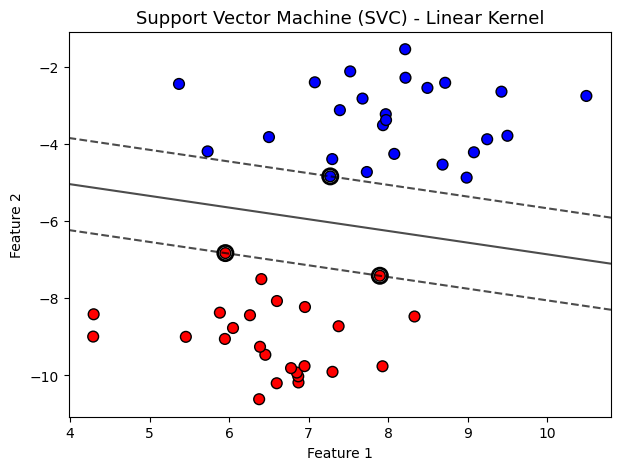

In [1]:
## 📉 Example (2D Case)

# For a 2D dataset, the hyperplane is simply a line that divides two classes.

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np

# Generate a simple 2D dataset
X, y = datasets.make_blobs(n_samples=50, centers=2, random_state=6)

# Create and train the SVM model
clf = SVC(kernel='linear')
clf.fit(X, y)

# Plot the points and the decision boundary
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=60, edgecolors='k')

# Get the separating hyperplane
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1])
yy = np.linspace(ylim[0], ylim[1])
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k',
           levels=[-1, 0, 1], alpha=0.7,
           linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(clf.support_vectors_[:, 0],
           clf.support_vectors_[:, 1],
           s=120, linewidth=2, facecolors='none', edgecolors='k')

plt.title("Support Vector Machine (SVC) - Linear Kernel", fontsize=13)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### Marginal Plane

A marginal plane refers to the lines (in 2D) or planes (in higher dimensions) that run parallel to the separating hyperplane and touch the nearest data points from each class.

If we represent the hyperplane as:  

- w·x + b = 0

Then the marginal planes are:

- w·x + b = +1
- w·x + b = -1

The distance between these two planes is called the margin, and SVM tries to maximize this margin.

### Support Vectors

Support Vectors are the data points that are closest to the hyperplane.

- They are the most important points in the dataset.

- They define the position and orientation of the hyperplane.

- If you remove them, the hyperplane would change.

Points far away from the hyperplane do not affect its position.

## SVC (Support Vector Classifier)

SVC is used for classification problems.
It tries to find the best separating hyperplane between different classes.

Example:

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load a sample dataset (Iris)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("✅ Model trained successfully!")
print("Predictions:", y_pred[:10])

✅ Model trained successfully!
Predictions: [1 0 2 1 1 0 1 2 1 1]


## SVR (Support Vector Regressor)

SVR is used for regression problems.
It tries to fit as many data points as possible within a certain margin (epsilon).

Example:

In [ ]:
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVR model
reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("✅ SVR Model Trained Successfully!")
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

✅ SVR Model Trained Successfully!
R² Score: 0.160
Mean Squared Error: 1.101


### Advantages

- Works well for high-dimensional data

- Effective when there’s a clear margin of separation

- Can handle non-linear data using kernel functions

### Disadvantages

- Slow on large datasets

- Hard to interpret

- Choosing the right kernel is important

### Summary

| Concept             | Description                      |
| ------------------- | -------------------------------- |
| **Hyperplane**      | Boundary that separates classes  |
| **Margin**          | Distance between marginal planes |
| **Support Vectors** | Points closest to the hyperplane |
| **Goal of SVM**     | Maximize the margin              |
| **SVC**             | Support Vector Classifier        |
| **SVR**             | Support Vector Regressor         |


**In short:**

SVM finds the best boundary that separates classes with the maximum margin, and the data points that define this margin are called S**upport Vectors**.
